# Geochemistry. Session 1

This notebook is an extremely short introduction to python, notebooks, and solving differential equations.

## A few useful imports

We import packages useful for specific applications.

In [36]:
import numpy as np                        # pour le calcul numérique
import matplotlib.pyplot as plt           # pour les plots, et dessous, pour que les plots apparaissent dans le notebook
%matplotlib inline

## Playing with python

In [37]:
# Assigning a value to a variable
a = 1
print(a)

1


In [38]:
# Making a list
b = [3, 12.3, "toto"]
print(b)

[3, 12.3, 'toto']


In [39]:
# Making operations
a + b[0]          # Note that the first index is 0, not 1

4

In [40]:
# Trying to add a number and a string
a + b[-1]        # -1 refers to the last item of the list

TypeError: unsupported operand type(s) for +: 'int' and 'str'

In [41]:
# Now, some maths. Let's define a vector, i.e. a 1-dimensional array
c = np.array([2, 3, 9])
print(c)
print(type(c))

[2 3 9]
<class 'numpy.ndarray'>


In [42]:
# Many ways to create vectors. See the numpy documentation
# https://numpy.org/doc/stable/reference/index.html
x = np.arange(200) * 0.05
print(x[:10])

[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45]


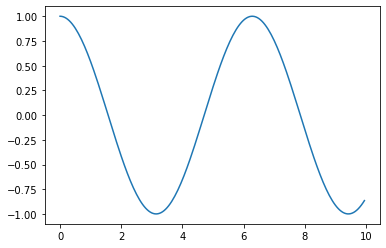

In [43]:
# Apply standard functions, make a plot
y = np.cos(x) # cosine
plt.plot(x,y)

## Solving a differential equation

We study this very simple system:
$$ \frac{dm}{dt} = - k m $$
with initial condition $m(0) = m_0 = 10$, $k=0.4$, and between $t=0$ and $t=24$.

### Define variables

In [44]:
m0 = 10
k = 0.4
tmin, tmax = 0, 24

### Analytical solution

The analytical solution is known:
$ m(t) = m_0 e^{-kt} $

Let's make the solution based on this equation: 

In [45]:
# times at which the solution is computed
time = np.arange(tmin, tmax, 0.1)

Text(0, 0.5, '$m(t)$ (kg)')

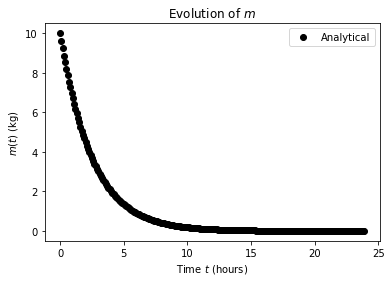

In [46]:
# Analytical solution
m_analytical = m0 * np.exp(-k*time)

# Plot
plt.plot(time, m_analytical, 'ko', label='Analytical')
plt.title('Evolution of $m$')
plt.legend()
plt.xlabel('Time $t$ (hours)')
plt.ylabel('$m(t)$ (kg)')

### Numerical solution

A computer makes it possible to solve a differential numerically, without formulating the analytical equation. Using Taylor's expansion between two consecutive time steps $t_n$ and $t_{n+1}$ separated by $\Delta t$:
$$ m(t_{n+1}) \approx m(t_{n}) + \Delta t \frac{dm}{dt}(t_n) = m(t_{n}) - k m(t_n) \Delta t $$
Starting from $n=0$, we can compute $m(t_1)$, then $m(t_2)$, etc.

Text(0, 0.5, '$m(t)$ (kg)')

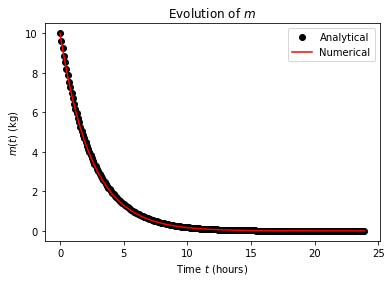

In [47]:
# Numerical solution

# Initializations, preparation
m = m0                                  # Initialization of m
dt = time[1] - time[0]                  # time step
number_of_time_steps = len(time)
m_numerical = np.empty(number_of_time_steps) # to save the results, then plot
m_numerical[0] = m

# Time iterations (loop)
for i in range(1,number_of_time_steps):
    m = m - k * m * dt
    m_numerical[i] = m
    
# Plot along with the analytical solution
plt.plot(time, m_analytical, 'ko', label='Analytical')
plt.plot(time, m_numerical, 'r', label='Numerical')
plt.title('Evolution of $m$')
plt.legend()
plt.xlabel('Time $t$ (hours)')
plt.ylabel('$m(t)$ (kg)')